# Exercise 1 Question d)

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
import matplotlib.pyplot as plt

In [2]:
def optimal_trading(tf):
    """
    time_frequency : float
        The frequency of trading in hour, e.g. every 30 min = 0.5
    -----------------
    return A list where 
    """
    #Initialize Variable
    n0 = 1_000_000
    P0 = 100
    lambda_ = 0.0001
    mu = 0
    gamma = 2
    rho = 1
    time_frequency = tf
    final_time = 6.5 #in hours
    annual_volatility = 0.3
    #number of minutes in 252 days is 60*6.5*252 = 98'280
    volatility_in_frequency = annual_volatility / np.sqrt((98_280/(time_frequency*60)))
    total_len = int(final_time/time_frequency) +2 + 1  # +1 as we start at 9:30 so need to count it # ask PB IF INDEED
    #Creat the constant for the Value function
    c = [None] * total_len
    q = [None] * total_len
    Q = [None] * total_len
    Q[total_len-1] , q[total_len-1] , c[total_len-1] = 0,0,0
    for i in range(total_len-2,0, -1):
        Q[i] = lambda_ - (lambda_**2)/(lambda_ + gamma*volatility_in_frequency**2 + rho * Q[i+1])
        q[i] = (lambda_ * (mu + rho*q[i+1]) )/(lambda_ + gamma*volatility_in_frequency**2 + rho * Q[i+1])
        c[i] = rho * c[i+1] + 0.5 * (mu + rho * q[i+1]**2)/(lambda_ + gamma*volatility_in_frequency**2 + rho * Q[i+1])
        
    
    #coumputation of tau and aim
    aim = [None] * (total_len)
    tau = [None] * (total_len)
    for i in range(total_len-2):
        if i == len(aim) - 2:
            aim[i] = 0
            tau[i] = (gamma * volatility_in_frequency**2 + rho * Q[i+1])/(lambda_ + gamma * volatility_in_frequency**2 + rho * Q[i+1])
        else:
            aim[i] = q[i+1]/Q[i+1]
            tau[i] = (gamma * volatility_in_frequency**2 + rho * Q[i+1])/(lambda_ + gamma * volatility_in_frequency**2 + rho * Q[i+1])
            
            
    #Computation of the number of stocks
    number_stocks = [None] * (total_len-1)
    number_stocks[0] = n0
    for i in range(1 , len(number_stocks)):
        number_stocks[i] = (1 - tau[i-1]) * number_stocks[i-1] + aim[i-1] * number_stocks[i-1]
    cost_of_trading = np.array(number_stocks)
    stocks_trade = (cost_of_trading[1:] -cost_of_trading[:-1])
    cost_of_trading = ((cost_of_trading[1:] -cost_of_trading[:-1])**2)*lambda_/2
    return number_stocks, cost_of_trading , -stocks_trade

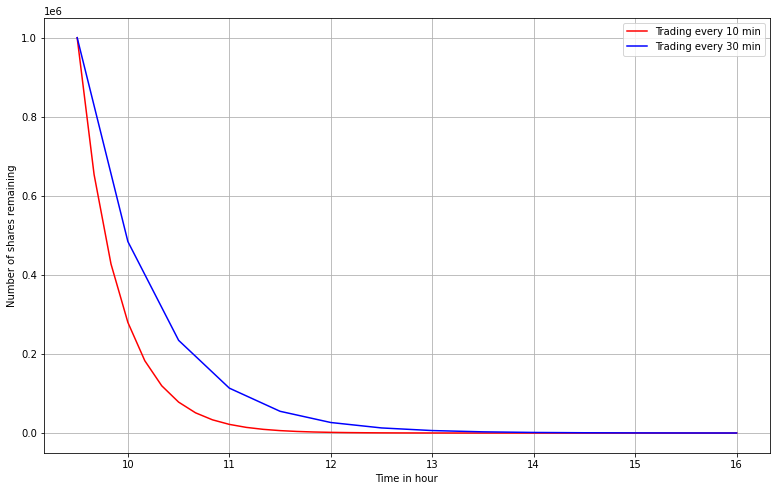

In [3]:
time_frequency = 1/6
optimal_weight_10 , cost_of_trading_10 , stocks_trade_10 = optimal_trading(time_frequency)
time10 = [9.5 + i*time_frequency for i in range(len(optimal_weight_10))]

time_frequency = 0.5
optimal_weight_30 , cost_of_trading_30 , stocks_trade_30 = optimal_trading(time_frequency)
time30 = [9.5 + i*time_frequency for i in range(len(optimal_weight_30))]


plt.figure(figsize = (13,8))
plt.plot(time10[:-1] , optimal_weight_10[:-1] , color = "red" , label = "Trading every 10 min")
plt.plot(time30[:-1] , optimal_weight_30[:-1] , color = "blue" , label = "Trading every 30 min")
plt.xlabel("Time in hour")
plt.ylabel("Number of shares remaining")
plt.legend()
plt.grid()


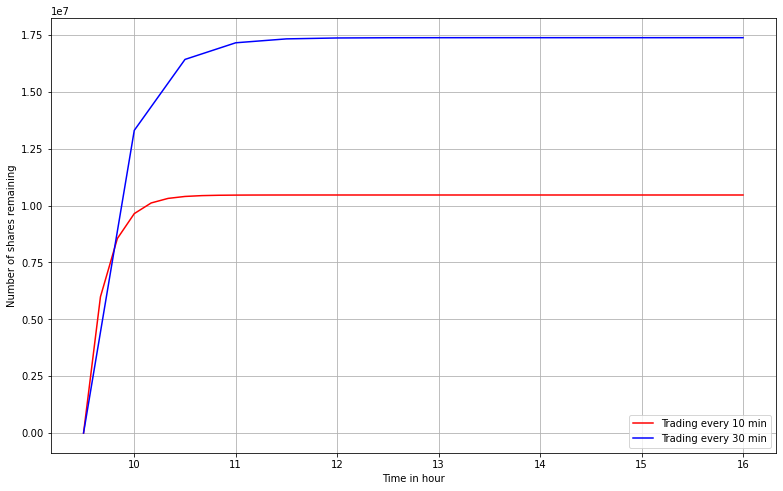

In [4]:
plt.figure(figsize = (13,8))
plt.plot(time10[:-1] , ([0] + cost_of_trading_10.cumsum().tolist())[:-1] , color = "red" , label = "Trading every 10 min")
plt.plot(time30[:-1] , ([0] + cost_of_trading_30.cumsum().tolist())[:-1] , color = "blue" , label = "Trading every 30 min")
#plt.yscale('log')
plt.xlabel("Time in hour")
plt.ylabel("Number of shares remaining")
plt.legend()
plt.grid()

In [5]:
def optimal_trading2(tf):
    """
    time_frequency : float
        The frequency of trading in hour, e.g. every 30 min = 0.5
    -----------------
    return A list where 
    """
    #Initialize Variable
    n0 = 1_000_000
    P0 = 100
    mu = 0
    gamma = 2
    rho = 1
    time_frequency = tf
    final_time = 6.5 #in hours
    annual_volatility = 0.3
    #number of minutes in 252 days is 60*6.5*252 = 98'280
    volatility_in_frequency = annual_volatility / np.sqrt((98_280/(time_frequency*60)))
    total_len = int(final_time/time_frequency) +2 + 1  # +1 as we start at 9:30 so need to count it # ask PB IF INDEED
    #Creat the time changing variable lambda
    lambda_ = [0.0001] * total_len
    hours12 = int((12-9.5)/time_frequency) + 1
    hours14 = int((14-9.5)/time_frequency) + 1
    for i in range(hours12 , hours14):
        lambda_[i] = 2*lambda_[i]

    
    #Creat the constant for the Value function
    c = [None] * total_len
    q = [None] * total_len
    Q = [None] * total_len
    Q[total_len-1] , q[total_len-1] , c[total_len-1] = 0,0,0
    for i in range(total_len-2,0, -1):
        Q[i] = lambda_[i+1] - (lambda_[i]**2)/(lambda_[i] + gamma*volatility_in_frequency**2 + rho * Q[i+1])
        q[i] = (lambda_[i+1] * (mu + rho*q[i+1]) )/(lambda_[i] + gamma*volatility_in_frequency**2 + rho * Q[i+1])
        c[i] = rho * c[i+1] + 0.5 * (mu + rho * q[i+1]**2)/(lambda_[i] + gamma*volatility_in_frequency**2 + rho * Q[i+1])
        
    
    #coumputation of tau and aim
    aim = [None] * (total_len)
    tau = [None] * (total_len)
    for i in range(total_len-2):
        if i == len(aim) - 2:
            aim[i] = 0
            tau[i] = (gamma * volatility_in_frequency**2 + rho * Q[i+1])/(lambda_[i] + gamma * volatility_in_frequency**2 + rho * Q[i+1])
        else:
            aim[i] = q[i+1]/Q[i+1]
            tau[i] = (gamma * volatility_in_frequency**2 + rho * Q[i+1])/(lambda_[i] + gamma * volatility_in_frequency**2 + rho * Q[i+1])
            
            
    #Computation of the number of stocks
    number_stocks = [None] * (total_len-1)
    number_stocks[0] = n0
    for i in range(1 , len(number_stocks)):
        number_stocks[i] = (1 - tau[i-1]) * number_stocks[i-1] + aim[i-1] * number_stocks[i-1]
    cost_of_trading = np.array(number_stocks)
    stocks_trade = (cost_of_trading[1:] -cost_of_trading[:-1])
    cost_of_trading = ((cost_of_trading[1:] -cost_of_trading[:-1])**2)*lambda_[1:-1]/2
    return number_stocks, cost_of_trading , -stocks_trade

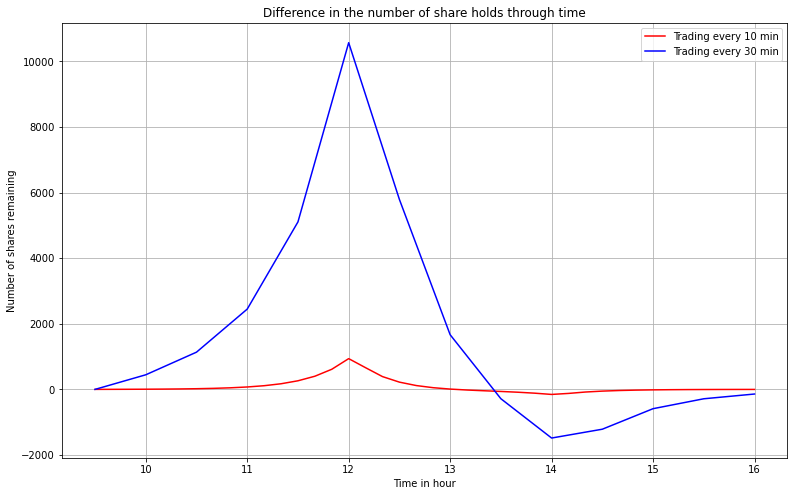

In [9]:
time_frequency = 1/6
optimal_weight_10_2 , cost_of_trading_10_2 , stocks_trade_10_2 = optimal_trading2(time_frequency)

time_frequency = 0.5
optimal_weight_30_2 , cost_of_trading_30_2 , stocks_trade_30_2 = optimal_trading2(time_frequency)

plt.figure(figsize = (13,8))
plt.plot(time10[:-1] , (np.array(optimal_weight_10) - np.array(optimal_weight_10_2))[:-1] , color = "red" , label = "Trading every 10 min")
plt.plot(time30[:-1] , (np.array(optimal_weight_30) - np.array(optimal_weight_30_2))[:-1] , color = "blue" , label = "Trading every 30 min")
plt.xlabel("Time in hour")
plt.ylabel("Number of shares remaining")
plt.title("Difference in the number of share holds through time")
plt.legend()
plt.grid()
plt.savefig('Diff_Number_Shares')

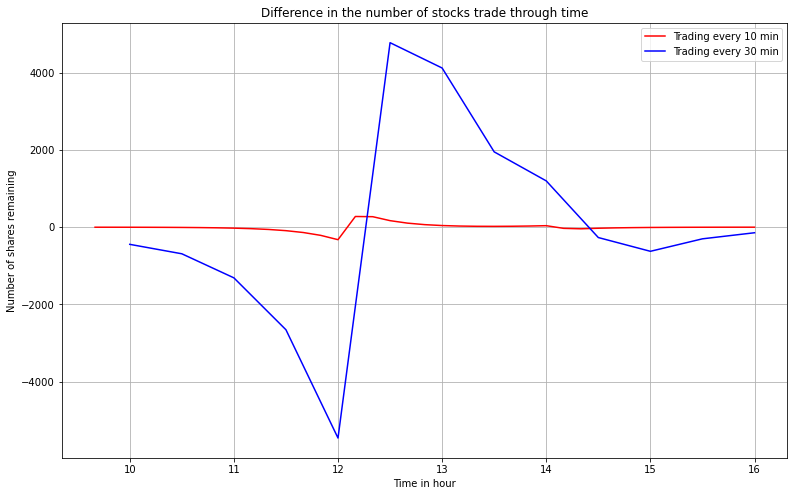

In [8]:
plt.figure(figsize = (13,8))
plt.plot(time10[1:-1] , (np.array(stocks_trade_10) - np.array(stocks_trade_10_2))[:-1] , color = "red" , label = "Trading every 10 min")
plt.plot(time30[1:-1] , (np.array(stocks_trade_30) - np.array(stocks_trade_30_2))[:-1] , color = "blue" , label = "Trading every 30 min")
plt.xlabel("Time in hour")
plt.ylabel("Number of shares remaining")
plt.title("Difference in the number of stocks trade through time")
plt.legend()
plt.grid()
plt.savefig('Diff_Number_Trade')